In [4]:
import torch
import sys

sys.path.append('..')

import torch
from SourceCode import *
from math import e


# № 1

$$ u_{xx}-4u = \alpha sin(2x) $$
$$ x \in [0, 1] $$
$$ \alpha \in [0,1] $$
$$ u(x=0)=1 $$
$$ u_x(x=0)=6$$
$$true\_sol= - exp(-2x)+2exp(2x)-sin(2x)\frac{\alpha}{8}$$

In [12]:
x_points = 20
x_left = 0
x_right = 1
param_points = 20
param_left = 0
param_right = 1

true_solution = lambda x, param: -e ** (-2 * x) + 2 * e ** (2 * x) - param / 8 * torch.sin(2 * x)

main_domain = TwoDimensionalSimpleDomain(x_points,
                                         x_left,
                                         x_right,
                                         param_points,
                                         param_left,
                                         param_right,
                                         offset=0.01)
main_eq_residuals = lambda x, param, nn_model: (nth_derivative(nn_model(x, param), x, 2)
                                                - 4 * nn_model(x, param) - param * torch.sin(2 * x))

init1_eq = lambda x, param, nn_model: nn_model(x, param) - torch.tensor(1.0, requires_grad=True)
init_cond1 = TwoDimInitialCondition(non_const_var_left_value=0,
                                    non_const_var_right_value=1,
                                    non_const_var_size=10,
                                    equation=init1_eq,
                                    const_var_value=0, const_var_ind=1)

init2_eq = (lambda x, param, nn_model: nth_derivative(nn_model(x, param), x, 1) -
                                       torch.tensor(6.0, requires_grad=True))
init_cond2 = TwoDimInitialCondition(non_const_var_left_value=0,
                                    non_const_var_right_value=1,
                                    non_const_var_size=10,
                                    equation=init2_eq,
                                    const_var_value=0, const_var_ind=1)
init_conds = [init_cond1, init_cond2]

main_eq = MainEquationClass(main_domain, main_eq_residuals, boundary_conditions=init_conds)

n_epochs = 40
nn_params = {'hidden_dim': 20, 'num_hidden_layers': 2}
models = NNGenerator.generate_models(nn_count=1, inp_dim=2, nn_params=nn_params)

nn_ode_solver = TrainerForNNEquationSolver(
    main_eq, n_epochs=n_epochs, nn_models=models, lr=0.5
)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

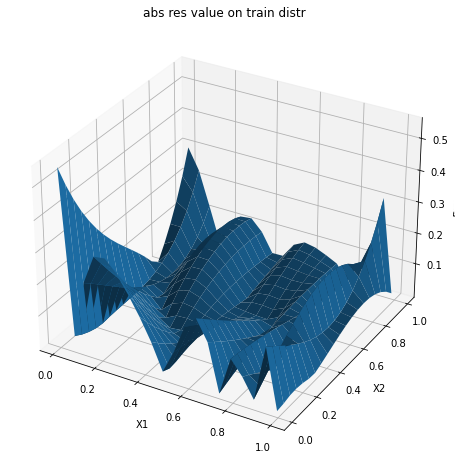

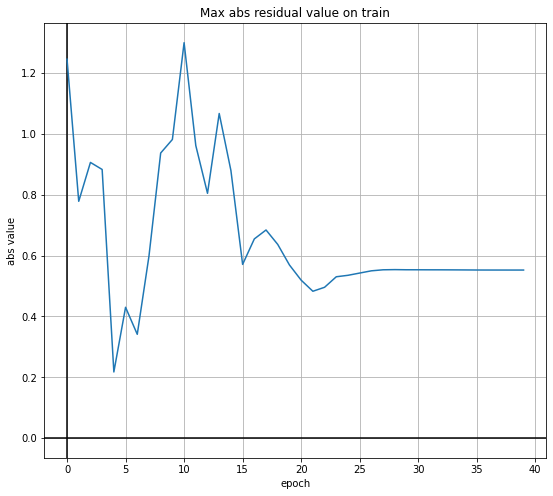

Max residual value |R[NN]| on train: 0.5524556040763855
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.9297924041748047
Valid max absolute error |Appr(x)-y(x)|: 0.9110813140869141
MAPE on train data: 4.849528148770332 %
MAPE on validation data: 4.8584602773189545 %
Max abs value of residual on train at last epoch: 0.5524627566337585 


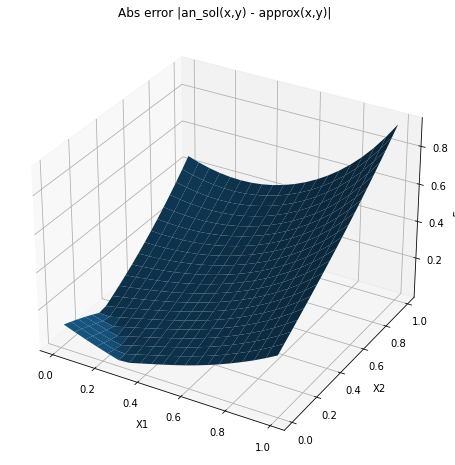

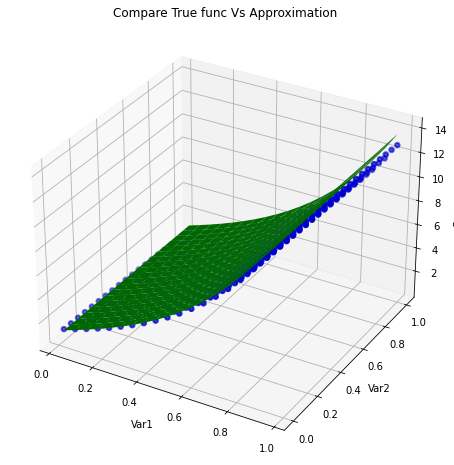

train data
     Input_X1  Input_X2  Analytical_F      ANN_F  Abs error
0        0.01  0.010000      1.060179   1.165479   0.105300
1        0.01  0.061579      1.060050   1.148431   0.088381
2        0.01  0.113158      1.059921   1.130221   0.070300
3        0.01  0.164737      1.059792   1.110801   0.051008
4        0.01  0.216316      1.059663   1.090119   0.030456
..        ...       ...           ...        ...        ...
395      0.99  0.783684     14.257544  13.481321   0.776222
396      0.99  0.835263     14.251628  13.438314   0.813313
397      0.99  0.886842     14.245713  13.394463   0.851251
398      0.99  0.938421     14.239798  13.349730   0.890068
399      0.99  0.990000     14.233883  13.304090   0.929792

[400 rows x 5 columns]


In [13]:
report = ReportMaker(nn_models,
                     loss_train,
                     loss_valid,
                     main_domain,
                     compare_to_functions=plot_two_2d_functions,
                     analytical_solutions=true_solution,
                     main_eq_residuals=main_eq_residuals
                     )
report.plot_abs_residual_distr(offset=0.01)
report.print_loss_history()
report.compare_appr_with_analytical(offset=0.01)
report.print_comparison_table()

# № 2

now lets try the one satisfying boundary condition

In [14]:
x_points = 10
x_left = 0
x_right = 1
param_points = 10
param_left = 0
param_right = 1

    
    

    
true_solution = lambda x, param: -e**(-2*x)+2*e**(2*x) - param/8*torch.sin(2*x)

main_domain = TwoDimensionalSimpleDomain(x_points,
                                         x_left,
                                         x_right,
                                         param_points,
                                         param_left,
                                         param_right,
                                         offset=0.01)
main_eq_residuals = lambda x, param, nn_model: (nth_derivative(nn_model(x, param), x, 2)
                                                - 4 * nn_model(x, param) - param*torch.sin(2*x) )
    
main_eq = MainEquationClass(main_domain, main_eq_residuals)
boundary_satisfying_models = [
    lambda x, y, model: 1+6*x+x*x*model(x, y)
]
    
n_epochs = 50
models = NNGenerator.generate_models(nn_count=1, inp_dim=2, 
                    boundary_satisfying_models=boundary_satisfying_models)

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, nn_models=models, lr=0.5
)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

In [15]:
report = ReportMaker(nn_models,
                     loss_train,
                     loss_valid,
                     main_domain,
                     compare_to_functions=plot_two_2d_functions,
                     analytical_solutions=true_solution,
                     main_eq_residuals=main_eq_residuals
                     )

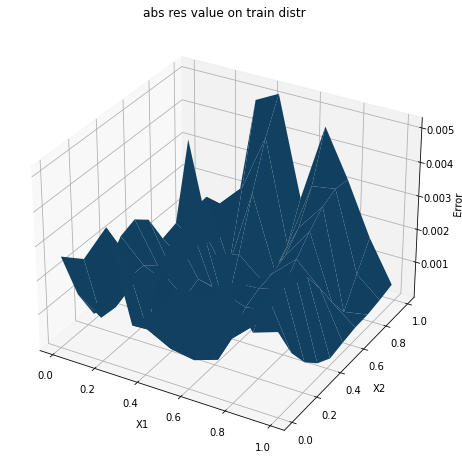

In [16]:
report.plot_abs_residual_distr(offset=0.01)

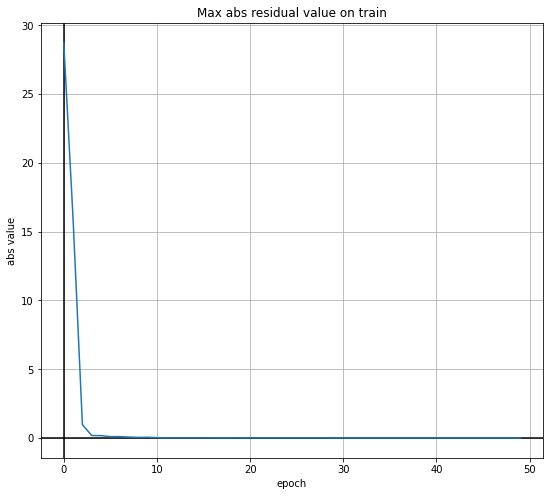

In [17]:
report.print_loss_history()

Max residual value |R[NN]| on train: 0.005190014839172363
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.43880462646484375
Valid max absolute error |Appr(x)-y(x)|: 0.4030189514160156
MAPE on train data: 1.4612209983170033 %
MAPE on validation data: 1.4617727138102055 %
Max abs value of residual on train at last epoch: 0.005203366279602051 


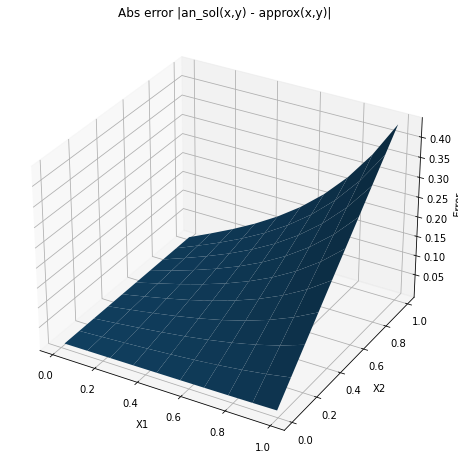

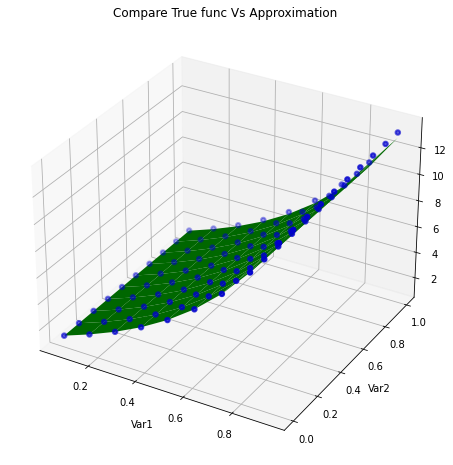

In [18]:
report.compare_appr_with_analytical(offset=0.01)

In [19]:
report.print_comparison_table()

train data
    Input_X1  Input_X2  Analytical_F      ANN_F  Abs error
0       0.01  0.010000      1.060179   1.060204   0.000025
1       0.01  0.118889      1.059907   1.060204   0.000297
2       0.01  0.227778      1.059635   1.060204   0.000569
3       0.01  0.336667      1.059362   1.060204   0.000842
4       0.01  0.445556      1.059090   1.060204   0.001114
..       ...       ...           ...        ...        ...
95      0.99  0.554444     14.283833  14.530751   0.246919
96      0.99  0.663333     14.271345  14.566427   0.295082
97      0.99  0.772222     14.258858  14.601982   0.343124
98      0.99  0.881111     14.246370  14.637400   0.391029
99      0.99  0.990000     14.233883  14.672688   0.438805

[100 rows x 5 columns]
